In [34]:
import tensorflow as tf

In [35]:
df = tf.keras.datasets.mnist

In [36]:
(X_train, y_train),(X_test, y_test) = df.load_data()

In [37]:
X_train, X_test = X_train/255.0, X_test/255.0

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [39]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2978 - accuracy: 0.9138 - val_loss: 0.1427 - val_accuracy: 0.9599
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1466 - accuracy: 0.9568 - val_loss: 0.0983 - val_accuracy: 0.9706
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1115 - accuracy: 0.9658 - val_loss: 0.0847 - val_accuracy: 0.9746
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0921 - accuracy: 0.9718 - val_loss: 0.0757 - val_accuracy: 0.9771
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0777 - accuracy: 0.9759 - val_loss: 0.0698 - val_accuracy: 0.9784
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0682 - accuracy: 0.9783 - val_loss: 0.0717 - val_accuracy: 0.9789
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0604 - accuracy: 0.9807 - val_loss: 0.0683 - val_accuracy:

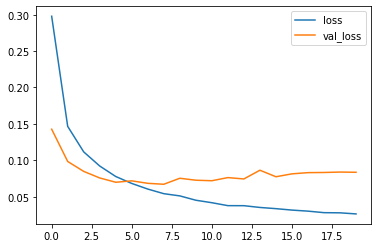

In [41]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend();

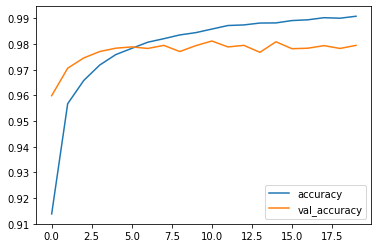

In [42]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend();

In [43]:
print(model.evaluate(X_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0835 - accuracy: 0.9795
[0.08351042121648788, 0.9794999957084656]


Confusion matrix, without normalization
[[ 975    0    1    1    0    1    0    1    1    0]
 [   0 1122    2    2    0    0    2    1    6    0]
 [   1    0 1012    2    1    0    1    3   11    1]
 [   0    0    5  995    0    2    0    3    2    3]
 [   1    0    4    0  956    0    5    3    1   12]
 [   2    0    0   12    1  865    5    0    5    2]
 [   5    2    0    1    2    5  939    0    4    0]
 [   3    1   13    7    0    0    0  994    2    8]
 [   6    0    4    3    2    3    2    3  947    4]
 [   1    2    0    1    4    4    0    5    2  990]]


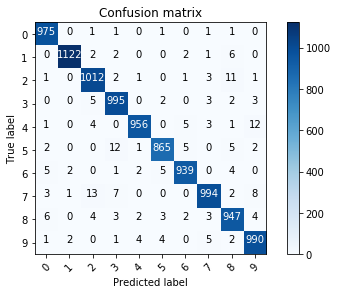

In [44]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

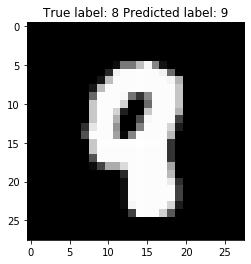

In [45]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i],cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));

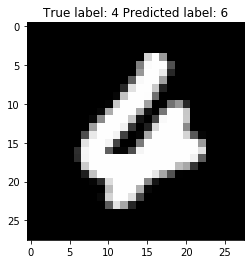

In [46]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i],cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));

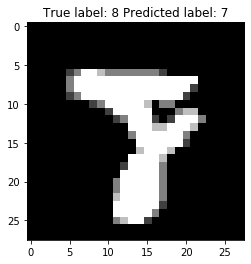

In [47]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i],cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));

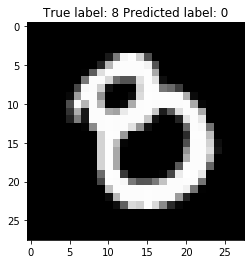

In [48]:
misclassified_img = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i],cmap='gray')
plt.title("True label: %s Predicted label: %s" %(y_test[i],p_test[i]));